<a href="https://colab.research.google.com/github/BeltranMal/TA047R-2C2024-GRUPO01/blob/main/TA047R_TP1_GRUPO01_ENTREGA_EJ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,GridSearchCV, cross_val_score
from sklearn.tree import (DecisionTreeClassifier,export_text,export_graphviz,plot_tree)
from sklearn.metrics import  make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análisis Exploratorio y preprocesamiento de datos



In [125]:
lluvia_en_australia = pd.read_csv('/content/drive/MyDrive/TA047R-2C2024-GRUPO01/weatherAUS.csv')

In [126]:
# Lista de localidades en formato string para cada estado y territorio
queensland = ["Brisbane", "Cairns", "GoldCoast", "Townsville"]
nueva_gales_del_sur = [ "Albury", "BadgerysCreek", "Cobar", "CoffsHarbour", "Moree", "Newcastle", "NorahHead", "Penrith", "Richmond", "Sydney", "SydneyAirport", "WaggaWagga", "Wollongong"]
territorio_capital = ["Canberra", "Tuggeranong"]

ciudades = lluvia_en_australia[lluvia_en_australia['Location'].isin(queensland + nueva_gales_del_sur + territorio_capital)].copy()
ciudades.Date = pd.to_datetime(ciudades.Date)

In [127]:
# Analizamos dimensiones
ciudades.shape

(58357, 23)

In [128]:
# Analizamos duplicados
ciudades.duplicated().sum()

0

In [129]:
ciudades.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,58357,57821.000000,57949.000000,57411.000000,28119.000000,22841.000000,52812.000000,57206.000000,56570.000000,57561.000000,56944.000000,51379.000000,51416.000000,33155.000000,32632.000000,57852.000000,57189.000000
mean,2013-03-03 07:35:02.678341888,13.552149,24.354251,2.865858,5.748924,7.827621,37.992615,12.436405,18.012533,69.236636,52.547046,1017.918476,1015.188885,4.310511,4.351495,18.327188,22.834790
min,2007-11-01 00:00:00,-8.200000,2.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,986.700000,982.900000,0.000000,0.000000,-3.100000,2.300000
25%,2010-12-07 00:00:00,9.000000,19.800000,0.000000,3.200000,5.400000,30.000000,6.000000,11.000000,58.000000,38.000000,1013.500000,1010.700000,1.000000,1.000000,14.000000,18.500000
50%,2013-04-11 00:00:00,14.100000,24.400000,0.000000,5.200000,9.000000,37.000000,11.000000,17.000000,69.000000,53.000000,1017.900000,1015.100000,5.000000,5.000000,18.800000,22.800000
75%,2015-05-20 00:00:00,18.700000,28.800000,0.600000,7.600000,10.600000,46.000000,19.000000,24.000000,81.000000,66.000000,1022.300000,1019.500000,7.000000,7.000000,22.900000,27.000000
max,2017-06-25 00:00:00,29.700000,47.300000,371.000000,86.200000,14.100000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000
std,NaN,6.560041,6.155152,10.524194,3.932574,3.730380,13.373451,8.864113,9.392210,16.812267,19.608897,6.645173,6.596006,2.891913,2.723272,6.218170,5.984159


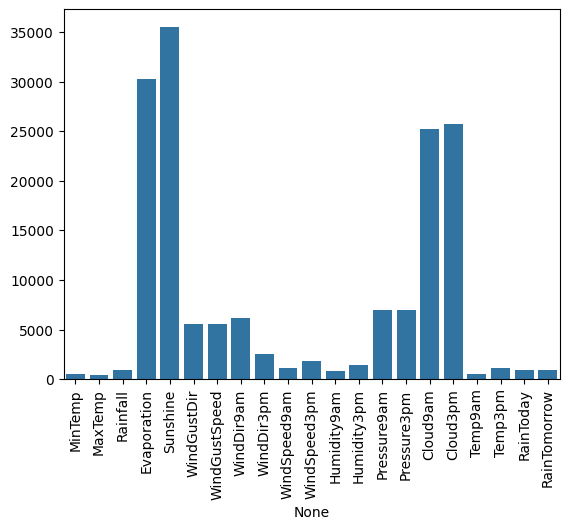

In [130]:
# Analizamos nulos por columnas
nulos_por_columnas = ciudades.isna().sum(axis=0)
columnas_nulas = nulos_por_columnas[nulos_por_columnas > 0]
sns.barplot(x=columnas_nulas.index, y=columnas_nulas.values)
plt.xticks(rotation=90)
plt.show()

In [131]:
# Porcentajes
ciudades.isna().sum(axis=0) / ciudades.shape[0] * 100

,0
Date,0.000000
Location,0.000000
MinTemp,0.918485
MaxTemp,0.699145
Rainfall,1.621057
Evaporation,51.815549
Sunshine,60.859880
WindGustDir,9.512141
WindGustSpeed,9.501859
WindDir9am,10.584848


In [132]:
#reemplazo de nulos por el valor mas frecuente
columnas_nulo = columnas_nulas.index
for columna in columnas_nulo:
    ciudades[columna] = ciudades[columna].fillna(ciudades[columna].mode()[0])


In [133]:
#creacion nuevas columnas
fecha = ciudades.loc[:,"Date"]
ciudades["meses"] = fecha.dt.month
ciudades["dia"] = fecha.dt.day
ciudades["year"] = fecha.dt.year

def generar_estacion(mes, dia):
  if (mes == 12 and dia >= 21) or (mes == 1 or mes == 2) or (mes == 3 and dia < 21):
    return "Verano"

  elif (mes == 3 and dia >= 21) or (mes == 4 or mes == 5) or (mes == 6 and dia < 21):
    return "Otoño"

  elif (mes == 6 and dia >= 21) or (mes == 7 or mes == 8) or (mes == 9 and dia < 21):
    return "Invierno"

  else:
    return "Primavera"

ciudades["estacion"] = ciudades.apply(lambda row: generar_estacion(row["meses"], row["dia"]), axis=1)
ciudades.drop(columns=["Date"], inplace = True)

In [134]:
def asignar_distrito(serie):
  if serie in queensland:
    return "Queensland"
  elif serie in nueva_gales_del_sur:
    return "Nueva Gales del Sur"
  else:
    return "Terr. de la Capital"

ciudades["distrito"] = ciudades["Location"].map(asignar_distrito)

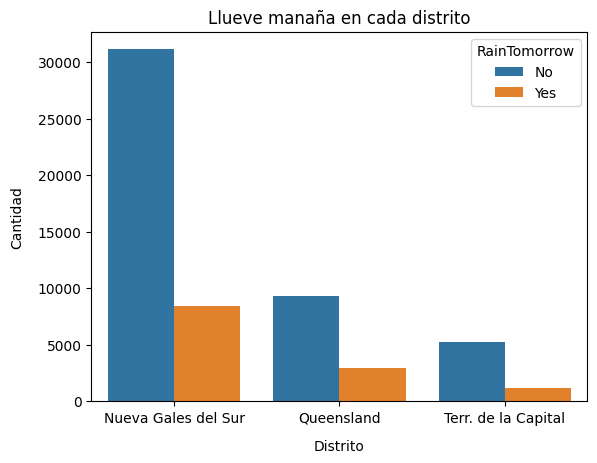

In [135]:
cantidad_lluvia_distrito = ciudades.groupby("distrito")["RainTomorrow"].value_counts().reset_index(name="cantidad")
sns.barplot(x=("distrito"), y="cantidad", hue="RainTomorrow", data=cantidad_lluvia_distrito)
plt.xlabel("Distrito", labelpad= 10)
plt.ylabel("Cantidad", labelpad= 10)
plt.title("Llueve manaña en cada distrito")

plt.show()

# Entrenamiento y Predicción

In [136]:
#encoded
label_encoder = LabelEncoder()

categoricas = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm","RainToday", "estacion", "distrito"]
ciudades_encoded = ciudades.copy()

ciudades_encoded = pd.get_dummies(ciudades_encoded, columns=categoricas, drop_first= True, dtype=int)

ciudades_encoded["RainTomorrow"] = label_encoder.fit_transform(ciudades_encoded["RainTomorrow"])

In [137]:
target = ciudades_encoded["RainTomorrow"]
features = ciudades_encoded.drop(columns=["RainTomorrow"])
ciudades_encoded.corr()['RainTomorrow'].sort_values(ascending = False)

,RainTomorrow
RainTomorrow,1.000000
Humidity3pm,0.454162
RainToday_Yes,0.313596
Cloud3pm,0.292377
Humidity9am,0.281446
...,...
MaxTemp,-0.077256
Pressure3pm,-0.110723
Temp3pm,-0.114012
Pressure9am,-0.130133


In [138]:
x_train, x_test, y_train, y_test = train_test_split(features.values,
                                                    target.values,
                                                    test_size=0.2,
                                                    random_state=13,
                                                   stratify=target.values)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True).iloc[1]*100))

(46685, 88) (11672, 88) (46685,) (11672,)
% Positivos Entrenamiento: 21.559
% Positivos Prueba: 21.564


## Modelo 1 : Árbol de decisión


In [139]:
arbol_ = DecisionTreeClassifier(class_weight='balanced',random_state=10)


metricas = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score,average="weighted"),
    'recall_weighted': make_scorer(recall_score,average="weighted"),
    'f1_weighted': make_scorer(f1_score,average="weighted")
}

folds = [5,10]

def conseguir_mejor_metrica(folds, metricas, arbol):
  resultados = []
  for fold in folds:
    k_fold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=10)
    resultado_k_fold = []
    for nombre, valor in metricas.items():
      puntaje_metrica = cross_val_score(arbol, x_train, y_train, cv=k_fold, scoring=nombre)
      resultado_k_fold.append((nombre, puntaje_metrica.mean()))
    resultados.append((f"con el fold {fold} tuve: ", resultado_k_fold))

  for resultado in resultados:
    print(resultado)

conseguir_mejor_metrica(folds,metricas,arbol_)

('con el fold 5 tuve: ', [('accuracy', 0.7880689729035021), ('precision_weighted', 0.7895028652219881), ('recall_weighted', 0.7880689729035021), ('f1_weighted', 0.7887551027450066)])
('con el fold 10 tuve: ', [('accuracy', 0.7892255855179278), ('precision_weighted', 0.7894713451035891), ('recall_weighted', 0.7892255855179278), ('f1_weighted', 0.7893078889545696)])


In [140]:
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,10),
               'max_depth':list(range(1,10))}


puntaje_f1  = make_scorer(f1_score)


k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)


randomcv = RandomizedSearchCV(estimator=arbol_,
                              param_distributions = params_grid,
                              scoring=puntaje_f1,
                              cv=k_fold,random_state=10,return_train_score=True
                              )

randomcv.fit(x_train,y_train);

print(f"Mejores hiperparametros: {randomcv.best_params_}")
print(f"Mejor metrica: {randomcv.best_score_}")

Mejores hiperparametros: {'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'entropy', 'ccp_alpha': 0.005555555555555556}
Mejor metrica: 0.5693782346114342


In [141]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_
feature_names = ciudades_encoded.drop(columns=["RainTomorrow"]).columns
for feat_imp,feat in sorted(zip(feat_imps,feature_names)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

Cloud3pm: 0.027365668349296806
Rainfall: 0.03656142565137172
WindGustSpeed: 0.040848433106111304
Humidity3pm: 0.8952244728932202


In [142]:
best_tree.fit(x_train,y_train)
reglas = export_text(best_tree , feature_names=list(feature_names))
print(reglas)

|--- Humidity3pm <= 66.50
|   |--- Humidity3pm <= 51.50
|   |   |--- WindGustSpeed <= 43.50
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  43.50
|   |   |   |--- class: 0
|   |--- Humidity3pm >  51.50
|   |   |--- Rainfall <= 0.65
|   |   |   |--- class: 0
|   |   |--- Rainfall >  0.65
|   |   |   |--- class: 1
|--- Humidity3pm >  66.50
|   |--- Humidity3pm <= 82.50
|   |   |--- Cloud3pm <= 5.50
|   |   |   |--- class: 1
|   |   |--- Cloud3pm >  5.50
|   |   |   |--- class: 1
|   |--- Humidity3pm >  82.50
|   |   |--- class: 1



In [143]:
conseguir_mejor_metrica(folds,metricas,best_tree)

('con el fold 5 tuve: ', [('accuracy', 0.7749598372068116), ('precision_weighted', 0.8127811879340514), ('recall_weighted', 0.7749598372068116), ('f1_weighted', 0.7875353041890758)])
('con el fold 10 tuve: ', [('accuracy', 0.7763737347264671), ('precision_weighted', 0.8130782084986012), ('recall_weighted', 0.7763737347264671), ('f1_weighted', 0.7886827379669612)])


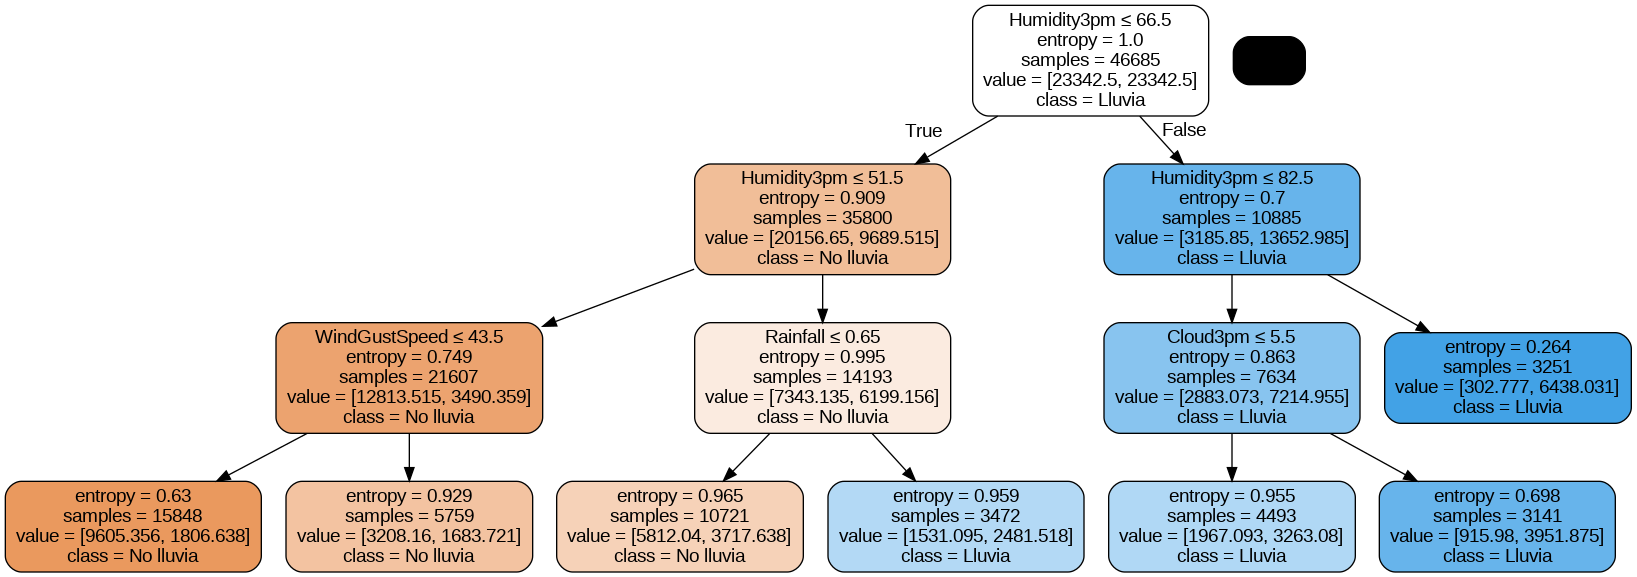

In [144]:
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_names,
                class_names=['No lluvia','Lluvia']
              )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Reporte de Clasificación de test:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      9155
           1       0.47      0.69      0.56      2517

    accuracy                           0.77     11672
   macro avg       0.69      0.74      0.70     11672
weighted avg       0.81      0.77      0.78     11672

F1-Score: 0.7804687627529969




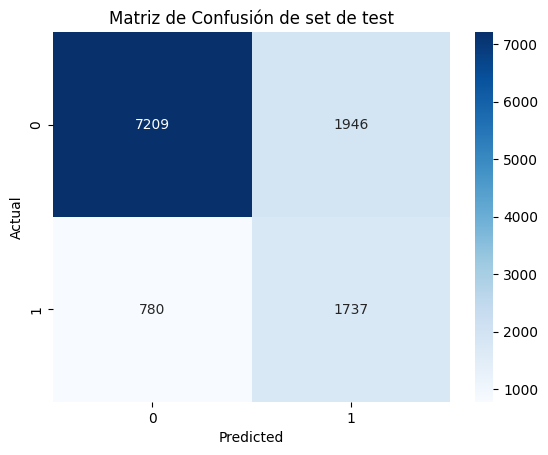

In [145]:
y_pred_test = best_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)

print("Reporte de Clasificación de test:\n", classification_report(y_test, y_pred_test))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test, average="weighted")))
print("\n")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión de set de test")
plt.show()

Reporte de Clasificación de train:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85     36620
           1       0.48      0.69      0.57     10065

    accuracy                           0.77     46685
   macro avg       0.69      0.74      0.71     46685
weighted avg       0.81      0.77      0.79     46685

F1-Score: 0.7876897112742206


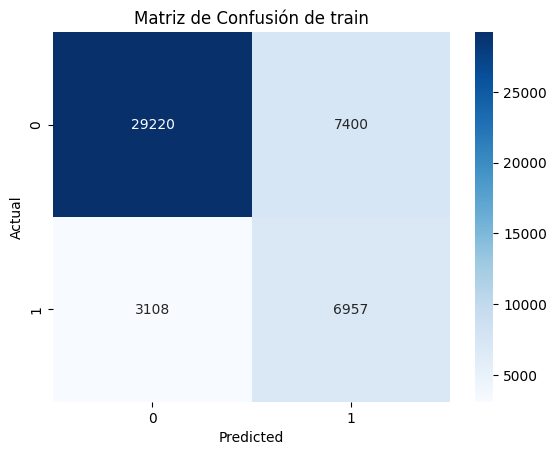

In [146]:
y_pred_train = best_tree.predict(x_train)
cm = confusion_matrix(y_train, y_pred_train)

print("Reporte de Clasificación de train:\n", classification_report(y_train, y_pred_train))
print("F1-Score: {}".format(f1_score(y_train, y_pred_train, average="weighted")))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión de train")
plt.show()

In [147]:
best_tree.predict_proba(x_test)

array([[0.84168957, 0.15831043],
       [0.37610482, 0.62389518],
       [0.84168957, 0.15831043],
       ...,
       [0.6558131 , 0.3441869 ],
       [0.6558131 , 0.3441869 ],
       [0.37610482, 0.62389518]])

## Modelo 2: Random Forest



In [148]:
x_train_forest, x_test_forest, y_train_forest, y_test_forest = train_test_split(features.values,
                                                    target.values,
                                                    test_size=0.2,
                                                    random_state=13,
                                                    stratify=target.values)

print(x_train_forest.shape, x_test_forest.shape, y_train_forest.shape, y_test_forest.shape)

for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train_forest,y_test_forest]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True).iloc[1]*100))

(46685, 88) (11672, 88) (46685,) (11672,)
% Positivos Entrenamiento: 21.559
% Positivos Prueba: 21.564


In [149]:
rf_cv = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1,class_weight='balanced')

In [150]:
param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10,20],
               "min_samples_split" : [2, 4, 10, 12, 16],
               "n_estimators": [35,40, 60,80],
               'max_depth':list(range(1,15)),
               'ccp_alpha':np.linspace(0,0.05,10)}

puntaje_f1  = make_scorer(f1_score,average="weighted")

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


search_random = RandomizedSearchCV(estimator=rf_cv,
                              param_distributions = param_grid,
                              scoring = puntaje_f1,
                              cv=kfold,
                              random_state=10,return_train_score=True
                              )


search_random.fit(x_train_forest,y_train_forest);

print(f"Mejores hiperparametros: {search_random.best_params_}")

print(f"Mejor metrica: {search_random.best_score_}")

best_rf = search_random.best_estimator_

Mejores hiperparametros: {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 2, 'criterion': 'entropy', 'ccp_alpha': 0.022222222222222223}
Mejor metrica: 0.77913646325606


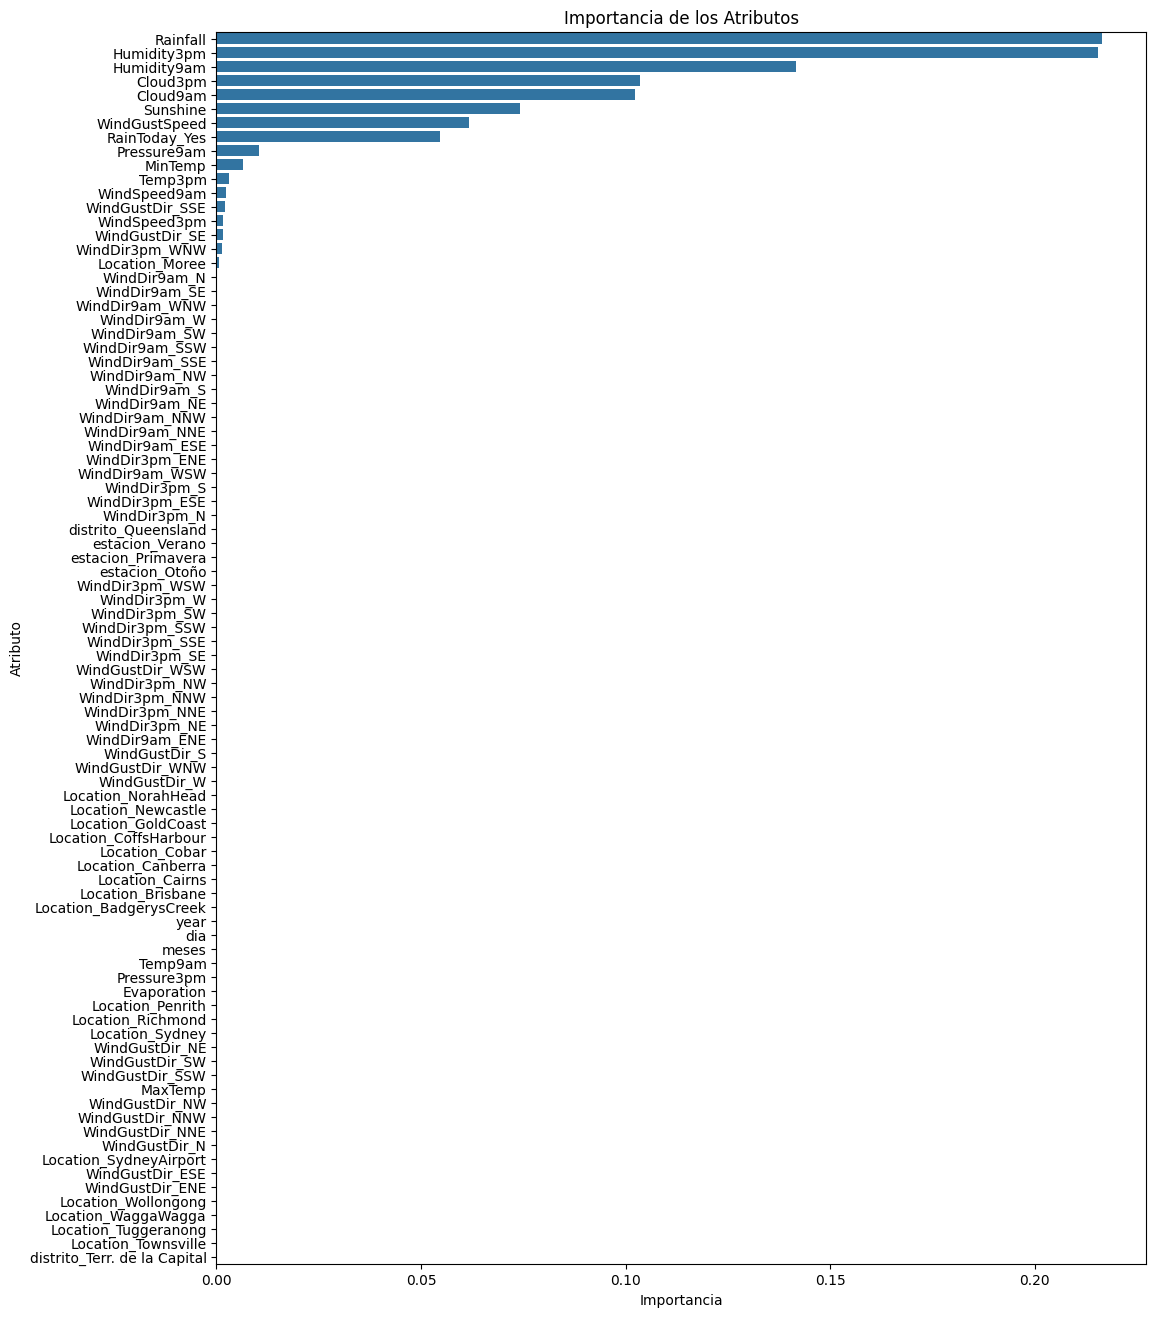

In [151]:
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=features.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12,16))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Importancia de los Atributos')
plt.xlabel('Importancia')
plt.ylabel('Atributo')
plt.show()

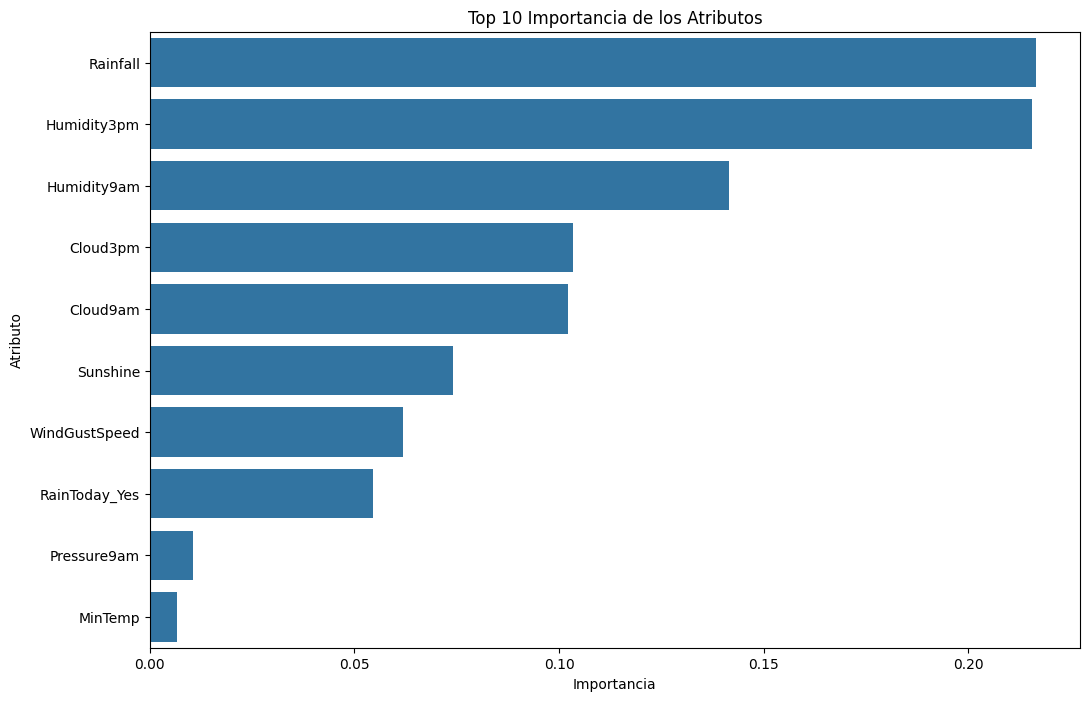

In [152]:
top_10_importance = feature_importances.nlargest(10, 'importance')

plt.figure(figsize=(12,8))
sns.barplot(x=top_10_importance.importance, y=top_10_importance.index)
plt.title('Top 10 Importancia de los Atributos')
plt.xlabel('Importancia')
plt.ylabel('Atributo')
plt.show()

In [153]:
# Entrenamos con nuestro mejor RandomForestClassifier
best_rf.fit(x_train_forest,y_train_forest)
trees = best_rf.estimators_[6]
reglas = export_text(trees , feature_names=list(feature_names))
print(reglas)

|--- Humidity9am <= 73.50
|   |--- class: 0.0
|--- Humidity9am >  73.50
|   |--- Rainfall <= 0.55
|   |   |--- class: 0.0
|   |--- Rainfall >  0.55
|   |   |--- class: 1.0



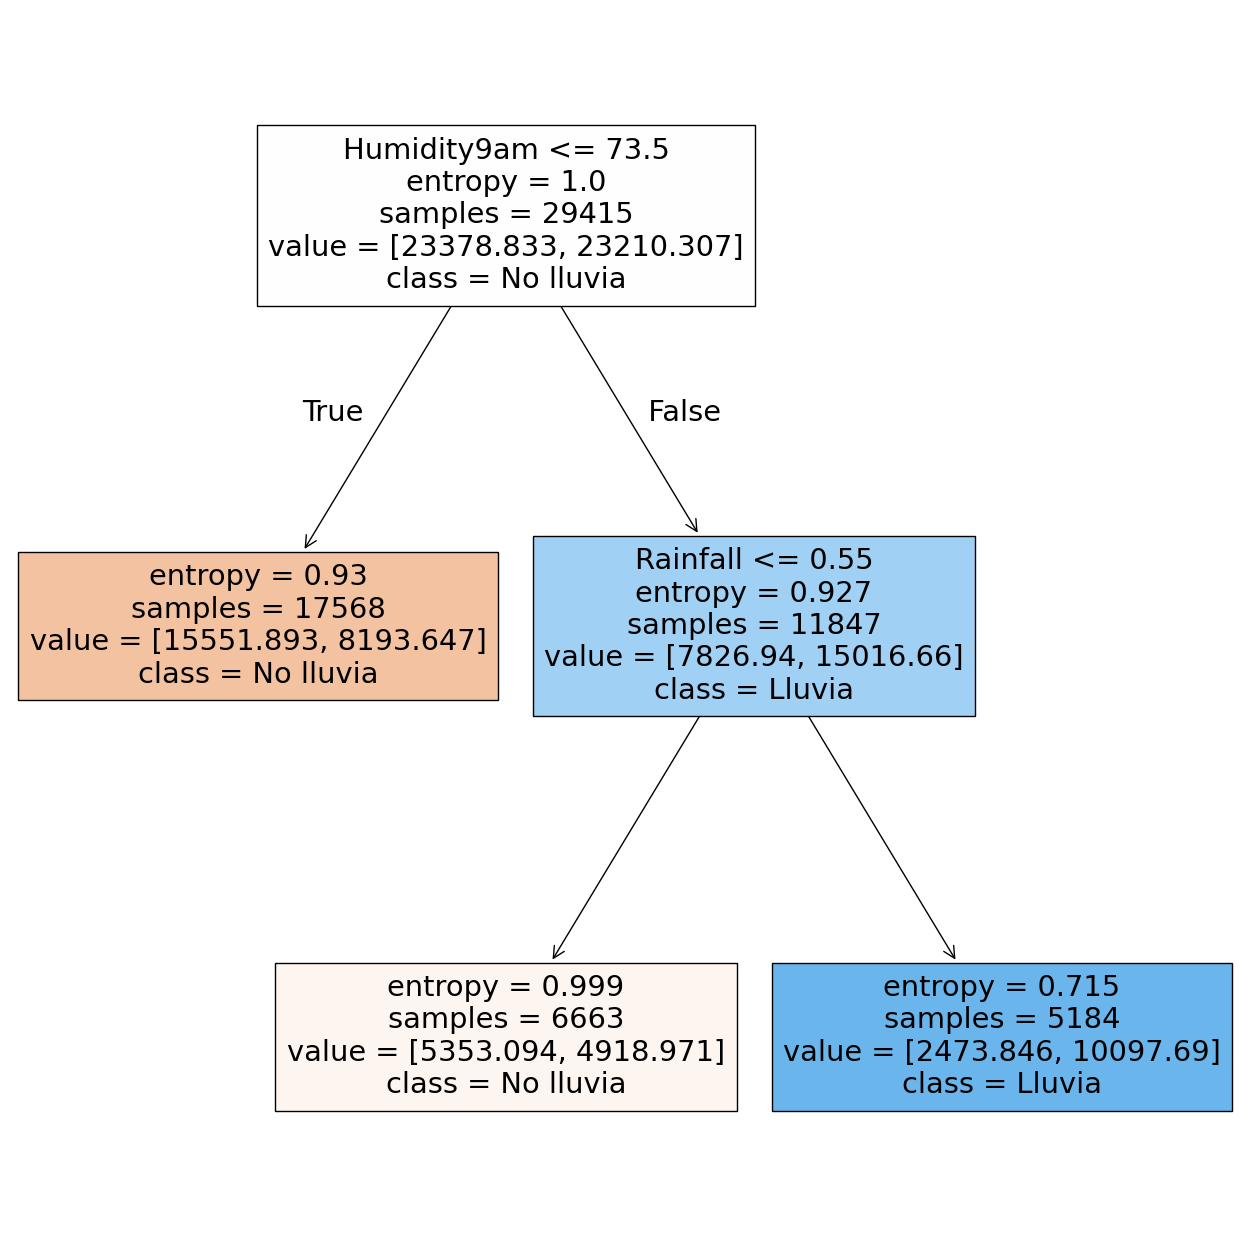

In [154]:
plt.figure(figsize=(16,16))
plot_tree(trees, feature_names=features.columns, filled=True, max_depth=11, class_names=["No lluvia", "Lluvia"])
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      9155
           1       0.47      0.68      0.55      2517

    accuracy                           0.76     11672
   macro avg       0.68      0.73      0.70     11672
weighted avg       0.81      0.76      0.78     11672

F1-Score: 0.7787413935267227




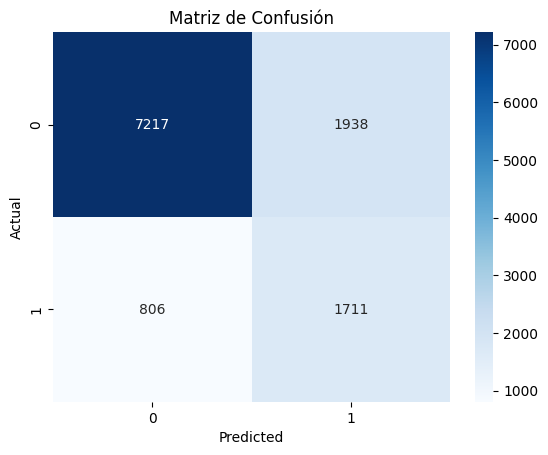

In [155]:
y_pred_forest = best_rf.predict(x_test_forest)
cm_forest = confusion_matrix(y_test_forest, y_pred_forest)

print("Reporte de Clasificación:\n", classification_report(y_test_forest, y_pred_forest))
print("F1-Score: {}".format(f1_score(y_test_forest, y_pred_forest, average="weighted")))
print("\n")

sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     36620
           1       0.47      0.68      0.56     10065

    accuracy                           0.77     46685
   macro avg       0.68      0.73      0.70     46685
weighted avg       0.81      0.77      0.78     46685

F1-Score: 0.7792223748668899




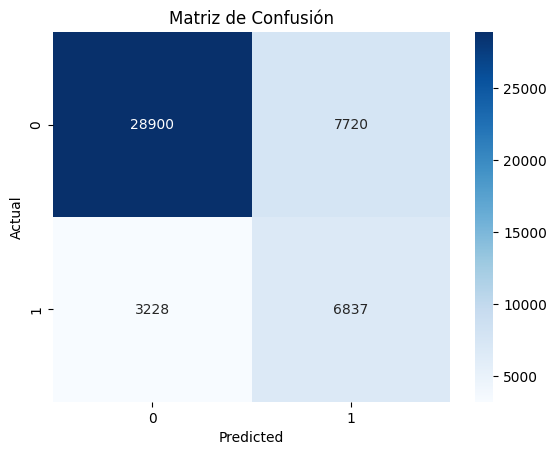

In [156]:
y_pred_forest = best_rf.predict(x_train_forest)
cm_forest_train = confusion_matrix(y_train_forest, y_pred_forest)

print("Reporte de Clasificación:\n", classification_report(y_train_forest, y_pred_forest))
print("F1-Score: {}".format(f1_score(y_train_forest, y_pred_forest, average="weighted")))
print("\n")

sns.heatmap(cm_forest_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

## Modelo 3: Regresion Logistica


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
x_train_logis, x_test_logis, y_train_logis, y_test_logis = train_test_split(features.values,
                                                    target.values,
                                                    test_size=0.2,
                                                    random_state=13,
                                                    stratify=target.values)

print(x_train_logis.shape, x_test_logis.shape, y_train_logis.shape, y_test_logis.shape)


for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train_logis,y_test_logis]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True).iloc[1]*100))

(46685, 88) (11672, 88) (46685,) (11672,)
% Positivos Entrenamiento: 21.559
% Positivos Prueba: 21.564


In [159]:
# Escalamos los datos
escalado = StandardScaler()
x_train_logis = escalado.fit_transform(x_train_logis)
x_test_logis = escalado.transform(x_test_logis)

In [160]:
log = LogisticRegression(random_state=42, class_weight="balanced")

f_fold_log = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(log, x_train_logis, y_train_logis, cv=f_fold_log, scoring="f1_weighted")

print(scores)

[0.80467623 0.80814726 0.80584391 0.80292607 0.80177174 0.80500206
 0.80705045 0.80406882 0.80705542 0.80134971]


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      9155
           1       0.51      0.75      0.60      2517

    accuracy                           0.79     11672
   macro avg       0.71      0.78      0.73     11672
weighted avg       0.83      0.79      0.80     11672



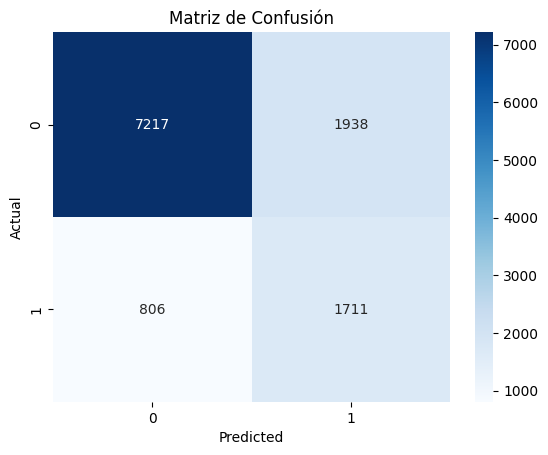

In [161]:
log.fit(x_train_logis, y_train_logis)
y_pred_log = log.predict(x_test_logis)

print("Reporte de Clasificación:\n", classification_report(y_test_logis, y_pred_log))

sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     36620
           1       0.51      0.77      0.62     10065

    accuracy                           0.79     46685
   macro avg       0.72      0.79      0.74     46685
weighted avg       0.84      0.79      0.81     46685





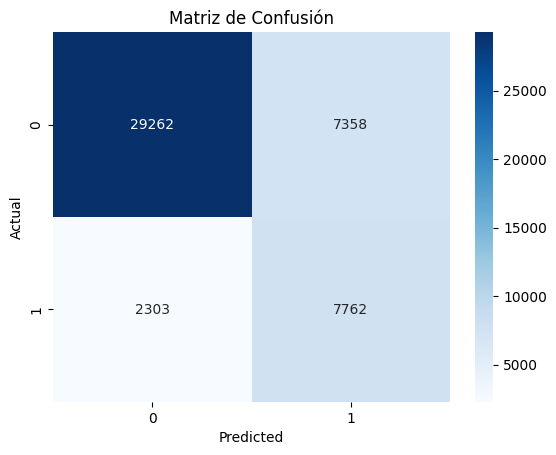

In [162]:
y_pred_logis = log.predict(x_train_logis)
cm_logis_train = confusion_matrix(y_train_logis, y_pred_logis)

print("Reporte de Clasificación:\n", classification_report(y_train_logis, y_pred_logis))
print("\n")

sns.heatmap(cm_logis_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()